In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#set datadir based on cwd
cwd = os.getcwd()
datadir = cwd + '/data/'
raw = pd.read_csv(datadir+'raw.csv')


In [3]:
df = raw.set_index('defendantid')
df = df.drop(['NewArrests36','NewFelArrests36', 'NewMisdArrests36', 'NewViolArrests36','NewArrest36', 'NewFelArrest36', 'NewMisdArrest36', 'NewViolArrest36'],axis = 1)

#created binary target variable
#we are going to predict if the preson will commit a crime or not in the future 36 month
df = df.rename(columns={'NewArrest36Type':'NewArrest36'})
#classified target variable from multiclass to binary
df['NewArrest36'] = df['NewArrest36'].apply(lambda x:0 if x == 'None' else 1 )
df.head()

,gender,race,category,MajorGroupDetail,AgeAtFirst,OrderProtect,Housing,Age,MisdConviction,FelonyConviction,...,Prison,Incarcerations5,Jail5,Prison5,Incarcerations10,Jail10,Prison10,CareerLength,CvtDensity,NewArrest36
defendantid,,,,,,,,,,,,,,,,,,,,,
15372,M,Asian/Pacific Islander,Misdemeanor,UGV,NaN,0,0,32.0,0,0,...,0,0,0,0,0,0,0,NaN,NaN,0
16191,F,Black,Misdemeanor,Forged Instrument,30.0,0,0,42.0,0,0,...,0,0,0,0,0,0,0,12.0,0.000000,0
24,M,Black,Misdemeanor,Marijuana,23.0,1,0,30.0,1,0,...,0,4,4,0,4,4,0,8.0,0.866025,1
959,M,Black-Hispanic,Misdemeanor,Drugs,33.0,0,1,54.0,1,1,...,1,4,4,0,11,11,0,23.0,1.693979,1
1596,M,Black,Felony,Grand Larceny,18.0,0,0,24.0,1,1,...,0,2,2,0,2,2,0,7.0,0.845154,1


In [12]:
#Feature Reduction
#Step 1: drop all columns with 10 and 9. We only look at data within 5 years
for i in df.columns:
    if '10' in i or '9' in i:
        df = df.drop(i,axis = 1)
#Step 2: drop features based on domain knowledge
df = df.drop(['CareerLength','MajorGroupDetail','CvtTypes'],axis = 1)

#Step 3: drop features by plotting
sns.countplot(x='Gang',data = df,palette='hls')
plt.show()

df = df.drop('Gang',axis = 1)


ValueError: labels ['CareerLength' 'MajorGroupDetail'] not contained in axis

In [5]:
df.head()

,gender,race,category,AgeAtFirst,OrderProtect,Housing,Age,MisdConviction,FelonyConviction,ViolentConviction,...,CvtTypes5,CvtCounties5,Incarcerations,Jail,Prison,Incarcerations5,Jail5,Prison5,CvtDensity,NewArrest36
defendantid,,,,,,,,,,,,,,,,,,,,,
15372,M,Asian/Pacific Islander,Misdemeanor,NaN,0,0,32.0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,0
16191,F,Black,Misdemeanor,30.0,0,0,42.0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0
24,M,Black,Misdemeanor,23.0,1,0,30.0,1,0,0,...,5,2,1,4,0,4,4,0,0.866025,1
959,M,Black-Hispanic,Misdemeanor,33.0,0,1,54.0,1,1,0,...,2,1,35,50,1,4,4,0,1.693979,1
1596,M,Black,Felony,18.0,0,0,24.0,1,1,0,...,2,1,1,2,0,2,2,0,0.845154,1


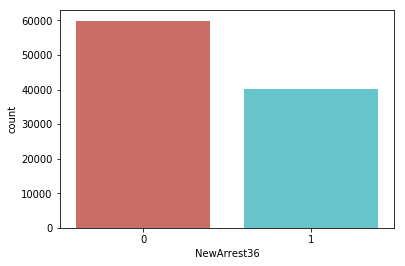

In [6]:
#check class balance 
sns.countplot(x='NewArrest36',data = df,palette='hls')
plt.show()

In [18]:
#check missing value
df.isnull().sum()

#replace missing value for some columns
df['category'] = df['category'].fillna('Unspecified')
#switch 1,0 for housing col 
df['Housing'] = df['Housing'].apply(lambda x: 1  if x==0 else 0)

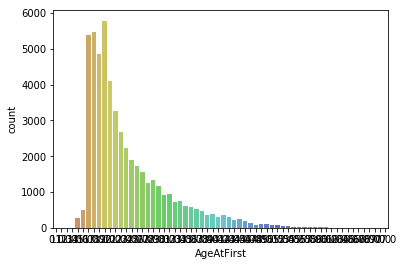

In [15]:
df.columns

Index(['gender', 'race', 'category', 'AgeAtFirst', 'OrderProtect', 'Housing',
       'Age', 'MisdConviction', 'FelonyConviction', 'ViolentConviction',
       'ViolentOffense', 'BWO24', 'BWO24Plus', 'Arrests', 'FelArrests',
       'MisdArrests', 'ViolArrests', 'Arrests5', 'FelArrests5', 'MisdArrests5',
       'ViolArrests5', 'Cvts', 'FelCvts', 'MisdCvts', 'ViolCvts', 'DrugCvts',
       'DrugFelCvts', 'SexCvts', 'BurgFelCvts', 'RobFelCvts', 'LarcFelCvts',
       'AssFelCvts', 'WeapFelCvts', 'CvtTypes', 'Cvts5', 'CvtCounties',
       'FelCvts5', 'MisdCvts5', 'ViolCvts5', 'DrugCvts5', 'CvtTypes5',
       'CvtCounties5', 'Incarcerations', 'Jail', 'Prison', 'Incarcerations5',
       'Jail5', 'Prison5', 'CvtDensity', 'NewArrest36'],
      dtype='object')

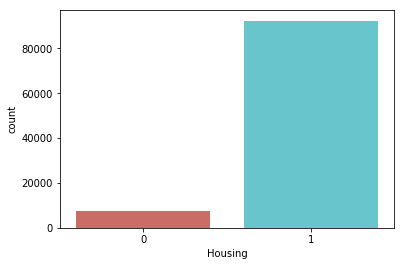

In [19]:
sns.countplot(x='Housing',data = df,palette='hls')
plt.show()